## Homework 2

In this homework, you will analyze a Portoguese banking institution's marketing campaign dataset and test various different learning methods. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.  

The information about dataset can be accessed from this link (http://archive.ics.uci.edu/dataset/222/bank+marketing). A copy of the data can also be found in the homework folder. Target feature is binary and is called ```y```. 

Please read the questions carefully.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.exceptions import DataConversionWarning
import warnings

In [6]:
df= pd.read_csv("/Users/pardissadatian/Desktop/Georgia State University/5.Foundation_of_Data_Science/2/2.bank-additional-full.csv", sep=';')

Q1 - Identify categorical and continuous variables in this dataset. Assign categorical ones to ```df_cat``` and continious ones to ```df_cont```. (8 pts)

In [10]:
df_cont = None
df_cat = None

q_df = pd.read_csv("/Users/pardissadatian/Desktop/Georgia State University/5.Foundation_of_Data_Science/2/2.Features.csv" , encoding='latin1', index_col='col_name')

In [11]:
df_cont = None
df_cat = None

interval = q_df[ q_df['scale (N, O, I, R)'].str[0] == 'I']
ratio = q_df[ q_df['scale (N, O, I, R)'].str[0] == 'R']

i_cols = list(interval.index.values)
r_cols = list(ratio.index.values)

continuous = i_cols + r_cols
print("Continuous")
print (continuous)

nominal = q_df[ q_df['scale (N, O, I, R)'].str[0] == 'N']
ordinal = q_df[ q_df['scale (N, O, I, R)'].str[0] == 'O']

n_cols = list(nominal.index.values)
o_cols = list(ordinal.index.values)

categorical = n_cols + o_cols
print("Categorical")
print (categorical) 

Continuous
['start_time', 'peak_time', 'end_time', 'start_time_bf24', 'fl_lon', 'fl_lat', 'fl_pa', 'cme_mpa', 'diff_a', 'cme_vel', 'cme_width', 'cme_assoc_conf', 'cdaw_cme_width', 'cdaw_cme_vel', 'cdaw_cme_pa', 'donki_cme_half_angle', 'donki_cme_vel', 'lowcat_cme_width', 'lowcat_cme_vel', 'lowcat_cme_pa', 'cme_valid_conf', 'goes_class_num', 'Background_X-ray_flux', 'relative_X-ray_flux_increase', 'fluorescence', 'fluorescence_fhalf', 'fluorescence_lhalf', 'Flare_rise_time', 'Flare_decay_time', 'Flare_duration', 'rise_gradient', 'decay_gradient', 'avg_fluorescence', 'avg_rise_fluorescence', 'avg_decay_fluorescence']
Categorical
['flare_id', 'noaa_active_region', 'cme_id', 'cdaw_cme_id', 'donki_cme_id', 'lowcat_cme_id', 'goes_class']


In [12]:
#Continuous

columns_to_extract = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

selected_columns = df[columns_to_extract]

df_cont = selected_columns

styled_df_cont = selected_columns.style.set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]}])

In [14]:
#Categorical

columns_to_extract = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'y', 'education', 'poutcome']

selected_columns = df[columns_to_extract]

df_cat = selected_columns

styled_df_cat = selected_columns.style.set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]}])

Q2 - Transform categorical variables into continuous ones (assign to ```df_tr_cat```). For ordinal variables, use ordinal encoding. For categorical variables, use one-hot encoding. Once done, merge the transformed continious features with existing continious features (assign to ```df_tcont```). (6 pts)

In [15]:
#categorical variables into continuous ones
df_tr_cont = None
columns_to_extract_cont = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'y', 'education', 'poutcome']

selected_columns = df[columns_to_extract_cont].copy()  

ordinal_cols = ['education', 'poutcome'] 
categorical_cols = [col for col in columns_to_extract_cont if col not in ordinal_cols]

ordinal_encoder = OrdinalEncoder()
df_tr_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(selected_columns[ordinal_cols]), columns=ordinal_cols)

df_tr_categorical = pd.get_dummies(selected_columns[categorical_cols], columns=categorical_cols, prefix=categorical_cols)

df_tr_cont = pd.concat([df_tr_ordinal, df_tr_categorical], axis=1)

styled_df_tr_cont = df_tr_cont.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])

merged_df_cont = pd.concat([df_cont, df_tr_cont], axis=1)

df_tcont = merged_df_cont

styled_merged_df_cont = df_tr_cont.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])

Q3 - Transform the continuous variables into categorical ones (assign to ```df_tr_cat```). Use equi-frequency histograms. Once done, merge the transformed categorical features with the existing ones (assign to ```df_tcont```). (6 pts)

In [17]:
#continuous variables into categorical ones
df_tr_cont = None
columns_to_extract_cat = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

num_bins = 5

df_tr_cat = pd.DataFrame()

for column in columns_to_extract_cat:
    # Check if the column has any null values
    if df[column].isnull().any():
        # Fill null values with the mean of the column
        df[column].fillna(df[column].mean(), inplace=True)

    # Check if the column has any non-null values
    if df[column].notnull().any():
        # Perform quantile binning
        bin_edges = pd.qcut(df[column], q=num_bins, labels=False, duplicates='drop', retbins=True)[1]
        df[column] = pd.cut(df[column], bins=bin_edges, labels=False)

        # Create a new categorical column
        df_tr_cat[column + '_cat'] = df[column].astype('category')

styled_df_tr_cat = df_tr_cat.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])

merged_df_cat = pd.concat([df_cat, df_tr_cat], axis=1)

df_tcat = merged_df_cat

styled_merged_df_cat = merged_df_cat.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])

Q4 - Separate the data into training (60%), validation(%15), and testing (25%). This should be done for original dataset (```df```), transformed datasets (```df_tcont``` and ```df_tcat```). (5 pts)

In [20]:
#Original Dataset (df)

from sklearn.model_selection import train_test_split

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Display the styled data in the resulting dataframes
styled_df_train = df_train.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("Training set:")
#display(styled_df_train)

styled_df_val = df_val.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("\nValidation set:")
#display(styled_df_val)

styled_df_test = df_test.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("\nTesting set:")
#display(styled_df_test)


In [21]:
#transformed datasets (df_tcont)

from sklearn.model_selection import train_test_split

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df_tcont, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Display the styled data in the resulting dataframes
styled_df_train = df_train.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("Training set:")
#display(styled_df_train)

styled_df_val = df_val.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("\nValidation set:")
#display(styled_df_val)

styled_df_test = df_test.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("\nTesting set:")
#display(styled_df_test)


In [22]:
#transformed datasets (df_tcat)

from sklearn.model_selection import train_test_split

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df_tcat, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Display the styled data in the resulting dataframes
styled_df_train = df_train.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("Training set:")
#display(styled_df_train)

styled_df_val = df_val.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("\nValidation set:")
#display(styled_df_val)

styled_df_test = df_test.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]}
])
#print("\nTesting set:")
#display(styled_df_test)


Q5 - For categorical variables, create a Categorical Naive Bayes classifier using the merged categorical dataset (```df_tcat```) partitioned in Q4. Using your validation dataset optimize the Laplace smoothing parameter. See ```alpha``` in the link (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html). After optimization, report your testing accuracy. (10 pts)

In [23]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Assuming 'y' is the target column in your dataset
target_column = 'y'

# Perform the split to get training and testing sets
train, test = train_test_split(df_tcat, test_size=test_ratio, random_state=42)

# Separate features (X) and target variable (y) in the training set
X_train = train.drop(columns=[target_column])
y_train = train[target_column]

# Separate features (X) and target variable (y) in the testing set
X_test = test.drop(columns=[target_column])
y_test = test[target_column]

# Identify categorical columns for imputation
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Impute missing values using SimpleImputer with "most_frequent" strategy for categorical columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Fit and transform the numeric features in the training set
X_train_numeric_imputed = imputer_numeric.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_numeric_imputed = imputer_numeric.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Fit and transform the categorical features in the training set
X_train_categorical_imputed = imputer_categorical.fit_transform(X_train[categorical_columns])
X_test_categorical_imputed = imputer_categorical.transform(X_test[categorical_columns])

# Concatenate the imputed numeric and categorical features
X_train_imputed = pd.concat([pd.DataFrame(X_train_numeric_imputed, columns=X_train.select_dtypes(include=['float64', 'int64']).columns),
                             pd.DataFrame(X_train_categorical_imputed, columns=categorical_columns)],
                            axis=1)

X_test_imputed = pd.concat([pd.DataFrame(X_test_numeric_imputed, columns=X_test.select_dtypes(include=['float64', 'int64']).columns),
                            pd.DataFrame(X_test_categorical_imputed, columns=categorical_columns)],
                           axis=1)

# Encode categorical features using OrdinalEncoder after imputing missing values
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# Range of alpha values to try for Laplace smoothing optimization
alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]

# Perform Laplace smoothing optimization using the validation set
best_accuracy = 0
best_alpha = None  # Placeholder for the best Laplace smoothing parameter

# Loop over different alpha values
for alpha in alpha_values:
    # Create a Categorical Naive Bayes classifier with the current alpha value
    clf = CategoricalNB(alpha=alpha)
    
    # Fit the classifier on the training data
    clf.fit(X_train_encoded, y_train)
    
    # Predict on the validation set
    y_pred = clf.predict(X_test_encoded)
    
    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current alpha gives a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha
        
# Report the best Laplace smoothing parameter and corresponding accuracy on the validation set
print(f"Best Laplace smoothing parameter: {best_alpha}")
print(f"Validation accuracy with the best alpha: {best_accuracy}")

# Create a final Categorical Naive Bayes classifier with the best alpha
final_clf = CategoricalNB(alpha=best_alpha)

# Fit the classifier on the entire training set
final_clf.fit(X_train_encoded, y_train)

# Predict on the test set
y_test_pred = final_clf.predict(X_test_encoded)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Report the testing accuracy with the best Laplace smoothing parameter
print(f"Testing accuracy with the best alpha: {test_accuracy}")

Best Laplace smoothing parameter: 0.1
Validation accuracy with the best alpha: 0.8851121685927941
Testing accuracy with the best alpha: 0.8851121685927941


Q6 - For continuous variables, create a Logistic Regression classifier using the merged categorical dataset (```df_tcont```) partitioned in Q4. Make sure you normalize the dataset using range normalization. Using the validation set, optimize the regularization parameters (```penalty``` and ```C``` -- see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). After optimization, report your testing accuracy and display an ROC curve for the best model. (10 pts)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Validation Accuracy: 0.9135642602784072
Test Accuracy: 0.9092056710040785


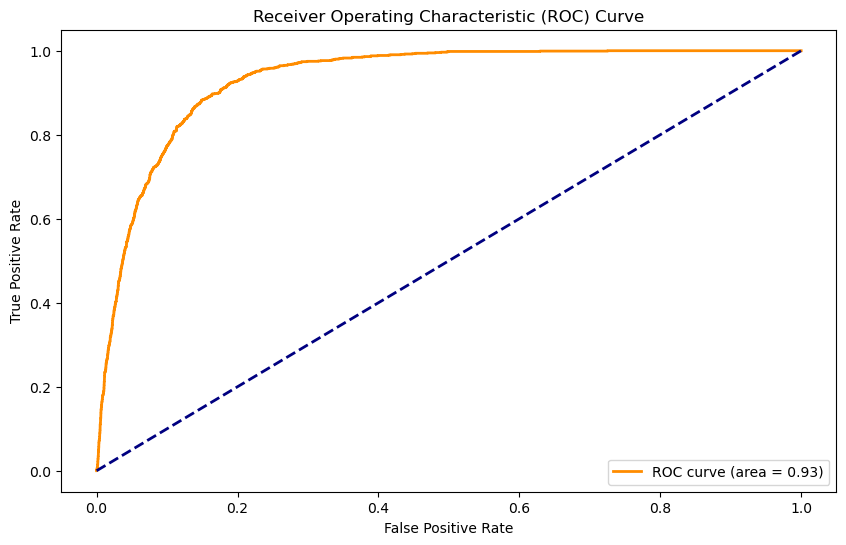

In [31]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df_tcont, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Assuming df_tcont is your DataFrame with continuous variables
# X should contain your feature columns, and y should contain your target variable
X_train = df_train.drop(['y_no', 'y_yes'], axis=1)
y_train = df_train[['y_no', 'y_yes']]

X_val = df_val.drop(['y_no', 'y_yes'], axis=1)
y_val = df_val[['y_no', 'y_yes']]

X_test = df_test.drop(['y_no', 'y_yes'], axis=1)
y_test = df_test[['y_no', 'y_yes']]

# Normalize Data with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Grid Search for Hyperparameter Tuning with increased max_iter
param_grid = {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train['y_yes'])

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on Validation Set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_scaled)

accuracy = accuracy_score(y_val['y_yes'], y_val_pred)
print("Validation Accuracy:", accuracy)

# Test Set Evaluation and ROC Curve
y_test_pred = best_model.predict(X_test_scaled)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test['y_yes'], y_test_pred)
print("Test Accuracy:", test_accuracy)

# Plot ROC curve
y_scores = best_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test['y_yes'], y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Q7 - Create a Decision Tree classifier (using CART algorithm) using the original dataset partitioned in Q4. Using the validation set, optimize the tree height and splitting criterion parameters (```criterion``` and ```max_depth``` -- see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). After optimization, report your confusion matrix and testing accuracy. (10 pts)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5}
Confusion Matrix on Validation Set:
 [[5248  226]
 [ 310  394]]
Validation Accuracy: 0.9132405309161541
Confusion Matrix on Test Set:
 [[8793  356]
 [ 529  620]]
Test Accuracy: 0.9140609827150903


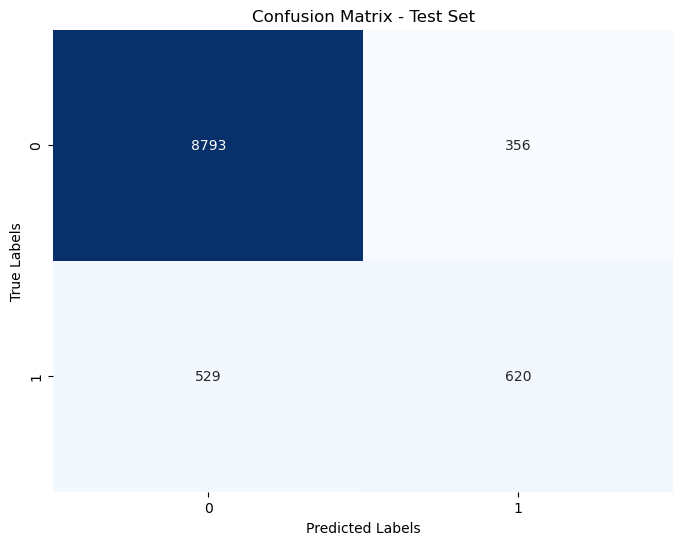

In [57]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df_tcont, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Assuming df is your DataFrame with the target columns 'y_no' and 'y_yes'
X_train = df_train.drop(['y_no', 'y_yes'], axis=1)
y_train = df_train[['y_no', 'y_yes']]

X_val = df_val.drop(['y_no', 'y_yes'], axis=1)
y_val = df_val[['y_no', 'y_yes']]

# Grid Search for Hyperparameter Tuning
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train['y_yes'])

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on Validation Set
best_tree = grid_search.best_estimator_
y_val_pred = best_tree.predict(X_val)

# Confusion Matrix on Validation Set
conf_matrix_val = confusion_matrix(y_val['y_yes'], y_val_pred)
print("Confusion Matrix on Validation Set:\n", conf_matrix_val)

# Testing Accuracy on Validation Set
val_accuracy = accuracy_score(y_val['y_yes'], y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Test Set Evaluation
X_test = df_test.drop(['y_no', 'y_yes'], axis=1)
y_test = df_test[['y_no', 'y_yes']]

y_test_pred = best_tree.predict(X_test)

# Confusion Matrix on Test Set
conf_matrix_test = confusion_matrix(y_test['y_yes'], y_test_pred)
print("Confusion Matrix on Test Set:\n", conf_matrix_test)

# Testing Accuracy on Test Set
test_accuracy = accuracy_score(y_test['y_yes'], y_test_pred)
print("Test Accuracy:", test_accuracy)

# Plot Confusion Matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Q8 - Using the best performing decision tree from Q7, inspect the most informative features. You can use the ```feature_importances_``` (See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) (5 pts)

Feature Importances:
               Feature  Importance
1            duration    0.499187
8         nr.employed    0.356522
7           euribor3m    0.042841
3               pdays    0.038417
6       cons.conf.idx    0.031339
43          month_oct    0.013616
5      cons.price.idx    0.007141
33   contact_cellular    0.003286
46    day_of_week_mon    0.003174
0                 age    0.001709
45    day_of_week_fri    0.001497
2            campaign    0.001270
37          month_dec    0.000000
38          month_jul    0.000000
39          month_jun    0.000000
40          month_mar    0.000000
41          month_may    0.000000
35          month_apr    0.000000
42          month_nov    0.000000
36          month_aug    0.000000
48    day_of_week_tue    0.000000
44          month_sep    0.000000
47    day_of_week_thu    0.000000
49    day_of_week_wed    0.000000
50         previous_0    0.000000
51         previous_1    0.000000
52         previous_2    0.000000
53         previous_3    0

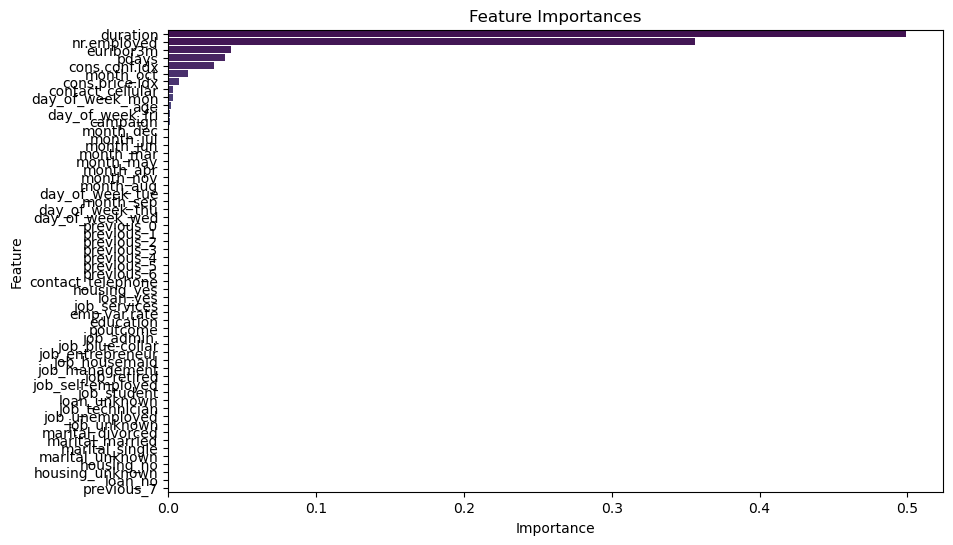

In [58]:
# Feature Importances
feature_importances = best_tree.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", feature_importance_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


Q9 - Using forward selection and feature elimination, find top-5 ranked features (select the five best features). Compare your results with the ones from Q8. For forward selection and feature elimination, you can use any non-tree estimator. (10 pts)

Selected Features: Index(['duration', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed'], dtype='object')
Confusion Matrix on Validation Set:
 [[5339  135]
 [ 433  271]]
Validation Accuracy: 0.9080608611201036
Confusion Matrix on Test Set:
 [[8919  230]
 [ 712  437]]
Test Accuracy: 0.9085259273645369


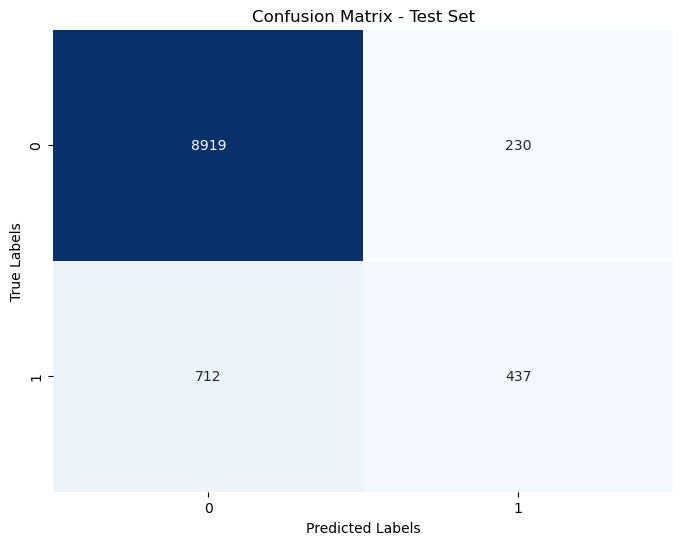

In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df_tcont, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Assuming df is your DataFrame with the target columns 'y_no' and 'y_yes'
X_train = df_train.drop(['y_no', 'y_yes'], axis=1)
y_train = df_train['y_yes']

X_val = df_val.drop(['y_no', 'y_yes'], axis=1)
y_val = df_val['y_yes']

# Remove constant features
X_train = X_train.loc[:, X_train.var() != 0]
X_val = X_val[X_train.columns]  # Use the same columns for validation set

# Feature selection using SelectKBest with ANOVA F-statistic
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train a Logistic Regression model with the selected features
logreg.fit(X_train_selected, y_train)

# Evaluate on Validation Set
y_val_pred = logreg.predict(X_val_selected)

# Confusion Matrix on Validation Set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix on Validation Set:\n", conf_matrix_val)

# Testing Accuracy on Validation Set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Test Set Evaluation
X_test = df_test.drop(['y_no', 'y_yes'], axis=1)
y_test = df_test['y_yes']

# Remove constant features in the test set
X_test = X_test.loc[:, X_train.columns]

# Transform the test set using the same selector
X_test_selected = selector.transform(X_test)

y_test_pred = logreg.predict(X_test_selected)

# Confusion Matrix on Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Set:\n", conf_matrix_test)

# Testing Accuracy on Test Set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Plot Confusion Matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Q10 - Create a boosting ensemble using the `AdaBoostClassifier` (from `sklearn.ensemble`). Boosting ensemble starts with a simple learning model, often a decision tree, and progressively updates the weights of the training instances to better predict the misclassified instances in previous iterations.

You are expected to use `DecisionTreeClassifier` (see `base_estimator` parameter in [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)) as your base estimator, with `max_depth` set to 2. Use 1 to 50 estimators (`n_estimators`). 

After training and obtaining the error rate for your AdaBoost ensemble, evaluate the validation and testing accuracy. 

Progressively increase the number of estimators from 1 to 50 in your ensemble classifier. Plot a line chart showing the progression of the error rate or accuracy as you increase the number of estimators in your ensemble. Based on your results, what do you think would be a good parameter for number of estimators? Why? (20 pts)

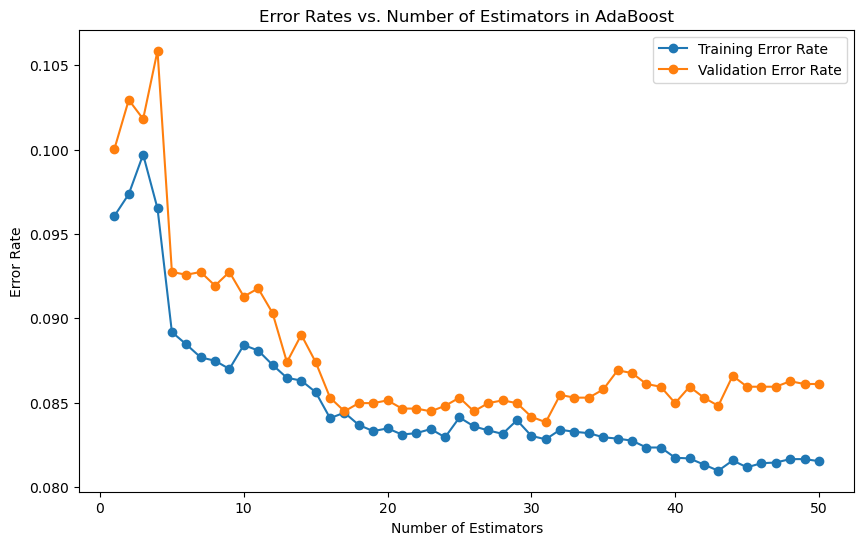

In [60]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier

# Specify the proportions for training, validation, and testing
train_ratio = 0.6
val_ratio = 0.15
test_ratio = 0.25

# Perform the first split to get training and temporary set
df_train, df_temp = train_test_split(df_tcont, test_size=1 - train_ratio, random_state=42)

# Perform the second split to get validation and testing sets
df_val, df_test = train_test_split(df_temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

# Assuming df is your DataFrame with the target columns 'y_no' and 'y_yes'
X_train = df_train.drop(['y_no', 'y_yes'], axis=1)
y_train = df_train['y_yes']

X_val = df_val.drop(['y_no', 'y_yes'], axis=1)
y_val = df_val['y_yes']

# Initialize lists to store error rates
train_error_rates = []
val_error_rates = []

# Vary the number of estimators from 1 to 50
for n_estimators in range(1, 51):
    # Create AdaBoost classifier with DecisionTreeClassifier as the base estimator
    ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=n_estimators, random_state=42)

    # Fit the model on the training set
    ada_clf.fit(X_train, y_train)

    # Predictions on training set
    y_train_pred = ada_clf.predict(X_train)
    # Calculate training error rate
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_error_rates.append(train_error)

    # Predictions on validation set
    y_val_pred = ada_clf.predict(X_val)
    # Calculate validation error rate
    val_error = 1 - accuracy_score(y_val, y_val_pred)
    val_error_rates.append(val_error)

# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_error_rates, label='Training Error Rate', marker='o')
plt.plot(range(1, 51), val_error_rates, label='Validation Error Rate', marker='o')
plt.title('Error Rates vs. Number of Estimators in AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


Q11 - Transform the following features to an all-binary dataset using one-hot encoding to boolean variables: `['job', 'marital', 'education', 'default', 'housing', loan]`. Using this binary dataset, create a kNN classifier that uses Jaccard as the similarity measure (in other words: 1-JaccardIndex as the distance). Use the same training, testing, and validation splits as in Q4. Optimize the classifier for number of nearest neighbors ('k' parameter). (15 pts)

In [61]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.exceptions import DataConversionWarning
import warnings

columns_to_extract_cont_Q11 = ['job', 'marital', 'education', 'default', 'housing', 'loan']
selected_columns = df[columns_to_extract_cont_Q11].copy()

# Perform one-hot encoding
df_tr_cont_Q11 = pd.get_dummies(selected_columns, drop_first=True, dtype=int)  # Use dtype=int

# Add the 'y' column from the original DataFrame to df_tr_cont_Q11
df_tr_cont_Q11['y'] = df['y']

columns_to_extract_cont_Q11 = ['job', 'marital', 'education', 'default', 'housing', 'loan']
selected_columns = df[columns_to_extract_cont_Q11].copy()

# Suppress DataConversionWarning for this block
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DataConversionWarning)

    # Perform one-hot encoding with dtype=bool
    df_tr_cont_Q11 = pd.get_dummies(selected_columns, drop_first=True, dtype=bool)

# Add the 'y' column from the original DataFrame to df_tr_cont_Q11
df_tr_cont_Q11['y'] = df['y']

# Split into training (60%), validation (15%), and testing (25%)
df_train, df_temp = train_test_split(df_tr_cont_Q11, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.625, random_state=42)

# Define features and target for training set
X_train = df_train.drop('y', axis=1).values  # Convert DataFrame to NumPy array
y_train = df_train['y']

# Create a kNN classifier with Jaccard similarity
k = 3 
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='jaccard')

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Evaluate the model performance on the validation set
X_val = df_val.drop('y', axis=1).values  # Convert DataFrame to NumPy array
y_val_true = df_val['y']
y_val_pred = knn_classifier.predict(X_val)

# Calculate Jaccard similarity score for binary classification
jaccard_similarity = jaccard_score(y_val_true, y_val_pred, pos_label='yes')  # Set pos_label to 'yes'

# Print the Jaccard similarity score
print(f"Jaccard Similarity on Validation Set: {jaccard_similarity}")

Jaccard Similarity on Validation Set: 0.029205607476635514
